In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [37]:
df = pd.read_csv('./solar_weather_clean.csv')
df

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,60,1,825,825,1.00,3,17,8


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 1:  Khi nào trong ngày và trong năm mức tiêu thụ năng lượng và mức bức xạ mặt trời (GHI) là cao nhất?   </b></font>
</div>

#### Lý do chọn Heatmap (ghi trong báo cáo)
- Hiển thị mối quan hệ theo thời gian: Heatmap giúp dễ dàng nhận diện khi nào trong ngày và trong năm mức tiêu thụ năng lượng và GHI cao nhất.
- Tính tương đối giữa các yếu tố: Heatmap giúp so sánh mức độ cao/thấp của các giá trị trên cùng một trục thời gian (theo giờ và tháng).
- Hiển thị rõ ràng xu hướng và mẫu: thấy rõ ràng những thời điểm trong ngày và trong năm mà mức tiêu thụ năng lượng và GHI đạt mức cao nhất, từ đó dễ dàng rút ra những kết luận quan trọng.
- Màu sắc trong heatmap sẽ biểu diễn giá trị của Energy delta[Wh] và GHI. Có thể dùng một biểu đồ heatmap với hai mảng màu riêng biệt hoặc vẽ hai biểu đồ heatmap khác nhau cho mỗi yếu tố (Energy delta[Wh] và GHI).

In [25]:
# Chuyển cột hour và month thành kiểu dữ liệu phù hợp 
df['hour'] = df['hour'].astype(int)
df['month'] = df['month'].astype(int)

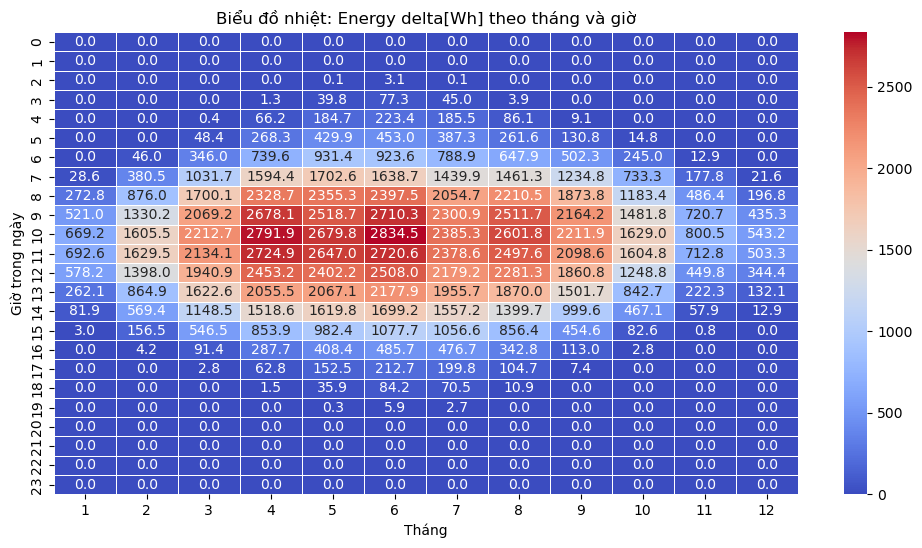

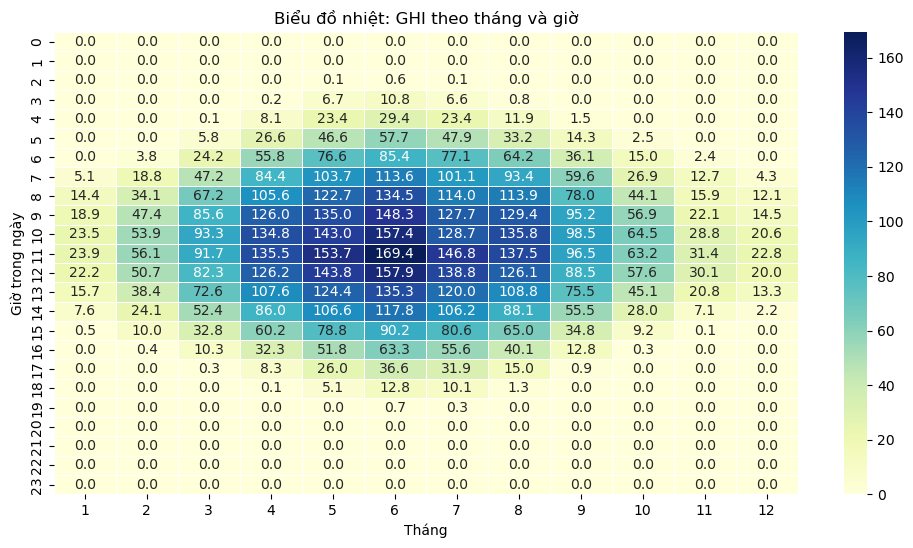

In [27]:
pivot_energy = df.pivot_table(values='Energy delta[Wh]', index='hour', columns='month', aggfunc='mean')
pivot_GHI = df.pivot_table(values='GHI', index='hour', columns='month', aggfunc='mean')

# Vẽ heatmap cho Energy delta[Wh]
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_energy, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Biểu đồ nhiệt: Energy delta[Wh] theo tháng và giờ')
plt.xlabel('Tháng')
plt.ylabel('Giờ trong ngày')
plt.show()

# Vẽ heatmap cho GHI
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_GHI, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Biểu đồ nhiệt: GHI theo tháng và giờ')
plt.xlabel('Tháng')
plt.ylabel('Giờ trong ngày')
plt.show()

### Biểu đồ Energy delta[Wh] (Mức tiêu thụ năng lượng)
##### Theo ngày: 
- Mức tiêu thụ năng lượng cao nhất: Dựa trên màu sắc của biểu đồ, có thể thấy rằng mức tiêu thụ năng lượng có xu hướng cao nhất vào buổi sáng và buổi chiều. Những giờ có mức tiêu thụ năng lượng cao thường là từ 6 giờ sáng đến 9 giờ sáng và từ 4 giờ chiều đến 7 giờ tối.
- Điều này có thể do nhu cầu tiêu thụ năng lượng cao hơn vào các giờ cao điểm khi mọi người bắt đầu sử dụng các thiết bị điện hoặc khi có hoạt động làm việc trong ngày.
##### Theo tháng:
- Mức tiêu thụ năng lượng cao nhất: Mức tiêu thụ năng lượng có xu hướng cao hơn vào các tháng cuối năm, đặc biệt là vào tháng 11 và tháng 12. Điều này có thể liên quan đến việc tiêu thụ năng lượng cho hệ thống sưởi ấm hoặc các thiết bị trong mùa lạnh, khi nhiệt độ ngoài trời giảm và nhu cầu sử dụng năng lượng tăng.


### Biểu đồ GHI (Global Horizontal Irradiance - Bức xạ mặt trời)
##### Theo ngày:
- Bức xạ mặt trời cao nhất: Dựa trên biểu đồ, có thể thấy rằng bức xạ mặt trời đạt cao nhất vào giữa ngày, đặc biệt là trong khoảng thời gian từ 12 giờ trưa đến 2 giờ chiều. Đây là thời điểm mặt trời ở cao nhất, tạo ra bức xạ mặt trời mạnh nhất.
- Các giờ sáng sớm (từ 6 giờ sáng đến 9 giờ sáng) và chiều tối (từ 5 giờ chiều trở đi) có mức bức xạ thấp hơn, vì mặt trời ở vị trí thấp và không tạo ra bức xạ mạnh.
##### Theo tháng: 
- Bức xạ mặt trời cao nhất: Bức xạ mặt trời đạt mức cao nhất vào mùa hè, đặc biệt là vào các tháng 6, 7, và 8, khi ngày dài hơn và có nhiều ánh sáng mặt trời hơn.
- Các tháng mùa đông (tháng 11 đến tháng 2) có mức bức xạ mặt trời thấp hơn, do ngày ngắn và mặt trời không chiếu sáng lâu.

### Nhận xét chung: Mối quan hệ giữa Energy delta[Wh] và GHI
- Có thể nhận thấy mối quan hệ giữa tiêu thụ năng lượng và bức xạ mặt trời. Mức tiêu thụ năng lượng cao nhất thường xảy ra vào các giờ có mức bức xạ mặt trời thấp (ví dụ: vào sáng sớm và chiều tối). Điều này có thể chỉ ra rằng nhu cầu năng lượng không hoàn toàn phụ thuộc vào bức xạ mặt trời, mà còn bị ảnh hưởng bởi các yếu tố khác như hoạt động của con người, nhiệt độ môi trường, hoặc nhu cầu sử dụng năng lượng cho các thiết bị khác.
- Tuy nhiên, vào các giờ giữa ngày (khi bức xạ mặt trời mạnh nhất), mức tiêu thụ năng lượng vẫn không phải là cao nhất, có thể là do mọi người đang sử dụng ít năng lượng hoặc vì các hệ thống năng lượng mặt trời đang hoạt động và cung cấp năng lượng trực tiếp.

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 2:  Có sự thay đổi nào về mức tiêu thụ năng lượng khi điều kiện thời tiết thay đổi (clear, cloudy, rainy) không?   </b></font>
</div>

#### Lí do chọn biểu đồ boxplot: (ghi trong báo cáo)
- Giúp trực quan hóa sự phân bố dữ liệu, đồng thời chỉ ra trung vị, tứ phân vị (Q1, Q3), và các giá trị ngoại lai (outliers) trong các nhóm thời tiết khác nhau.
- Cho phép so sánh trực tiếp mức tiêu thụ năng lượng giữa các nhóm weather_type, giúp chúng ta nhận ra sự khác biệt trong các phân phối mức tiêu thụ năng lượng cho từng điều kiện thời tiết.

In [41]:
# Kiểm tra các giá trị unique của cột 'weather_type' để đảm bảo các nhóm có tên đúng
print(df['weather_type'].unique())

# Tạo một dictionary ánh xạ các giá trị số thành các tên thời tiết (trong file datapreprocessing đã đề cập)
weather_mapping = {
    1: 'clear',    # Trời quang
    2: 'partly cloudy',   # Ít mây
    3: 'cloudy',    # Nhiều mây
    4: 'overcast', # U ám
    5: 'rainy'    # Mưa
}

df['weather_type'] = df['weather_type'].map(weather_mapping)
print(df['weather_type'].unique())

# Phân nhóm theo 'weather_type' và tính các chỉ số thống kê cho 'Energy delta[Wh]'
grouped_data = df.groupby('weather_type')['Energy delta[Wh]'].describe()
print(grouped_data)

[4 5 3 2 1]
['overcast' 'rainy' 'cloudy' 'partly cloudy' 'clear']
                 count        mean          std  min  25%   50%      75%  \
weather_type                                                               
clear          27976.0  825.724657  1343.331998  0.0  0.0   0.0  1282.25   
cloudy         31660.0  670.411118  1103.513501  0.0  0.0  18.0   884.00   
overcast       73004.0  411.460386   826.128332  0.0  0.0   0.0   379.00   
partly cloudy  35428.0  784.171729  1234.083553  0.0  0.0  10.0  1221.25   
rainy          28708.0  369.537690   728.570802  0.0  0.0  16.0   375.00   

                  max  
weather_type           
clear          4735.0  
cloudy         5020.0  
overcast       4913.0  
partly cloudy  4842.0  
rainy          4793.0  


##### Giải thích:
- Các giá trị 1, 2, 3, 4, 5 là đại diện cho các loại thời tiết khác nhau, có thể thực hiện ánh xạ từ các giá trị này sang các tên mô tả dễ hiểu hơn như clear, partly cloudy, cloudy, overcast, rainy
- groupby('weather_type'): Dữ liệu được phân nhóm theo cột weather_type.
- ['Energy delta[Wh]'].describe(): Tính toán các chỉ số thống kê mô tả (count, mean, std, min, 25%, 50%, 75%, max) cho mức tiêu thụ năng lượng (Energy delta[Wh]) trong mỗi nhóm thời tiết.
- count: Số lượng dữ liệu trong mỗi nhóm thời tiết.
- mean: Trung bình mức tiêu thụ năng lượng của từng nhóm.
- std: Độ lệch chuẩn của mức tiêu thụ năng lượng, chỉ ra sự phân tán của dữ liệu.
- min: Mức tiêu thụ năng lượng thấp nhất trong mỗi nhóm.
- 25% (Q1), 50% (median), 75% (Q3): Các phần tứ phân vị của mức tiêu thụ năng lượng.
- max: Mức tiêu thụ năng lượng cao nhất trong mỗi nhóm.

/var/folders/wc/y6_xwvh51zg9cvyj6v873gn40000gn/T/ipykernel_4334/533806655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_type', y='Energy delta[Wh]', data=df, palette="Set2")


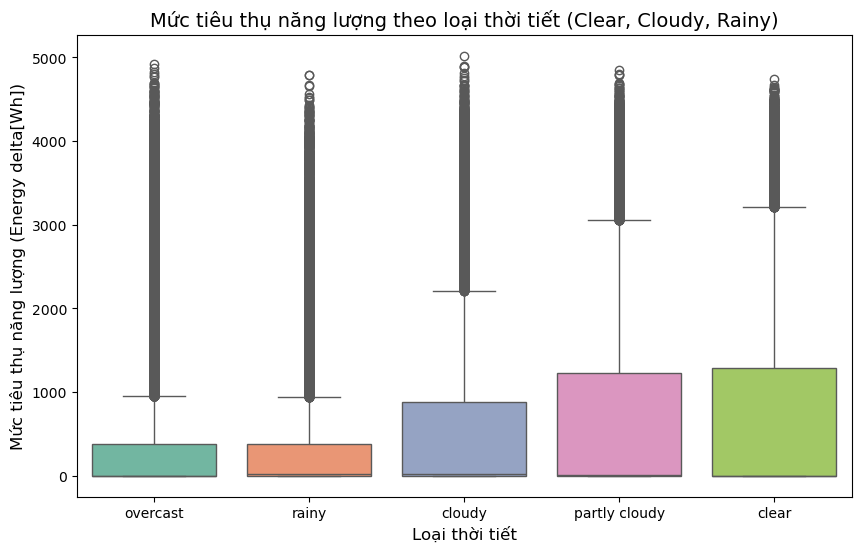

In [44]:
# Tạo biểu đồ boxplot cho mức tiêu thụ năng lượng theo từng loại thời tiết
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_type', y='Energy delta[Wh]', data=df, palette="Set2")

plt.title('Mức tiêu thụ năng lượng theo loại thời tiết (Clear, Cloudy, Rainy)', fontsize=14)
plt.xlabel('Loại thời tiết', fontsize=12)
plt.ylabel('Mức tiêu thụ năng lượng (Energy delta[Wh])', fontsize=12)
plt.show()

##### Thời tiết clear (Trời quang):
- Giá trị trung vị thấp nhất trong ba điều kiện, cho thấy mức tiêu thụ năng lượng thấp hơn khi trời trong.
- Phân bố dữ liệu có vẻ hẹp nhất, với các giá trị nằm gần trung bình, không có sự dao động lớn. Điều này có thể chỉ ra rằng trong điều kiện trời quang, mức tiêu thụ năng lượng khá ổn định và ít thay đổi.
- Các điểm ngoại lai (Outliers): Không có nhiều điểm ngoại lai xuất hiện trong nhóm "clear", điều này cho thấy hầu hết dữ liệu của nhóm này đều nằm trong phạm vi mức tiêu thụ năng lượng bình thường.
##### Thời tiết cloudy (Nhiều mây):
- Cloudy có mức trung vị cao hơn Clear nhưng thấp hơn Rainy.
- Phân bố có xu hướng rộng hơn, với giá trị nằm trải dài hơn, thể hiện sự dao động lớn hơn trong mức tiêu thụ năng lượng.
- Các điểm ngoại lai: Có một số điểm ngoại lai, có thể là do các sự kiện tiêu thụ năng lượng cao bất thường xảy ra trong những ngày nhiều mây.
##### Thời tiết rainy (Mưa):
- Có mức trung vị cao nhất, có thể chỉ ra rằng trong điều kiện mưa, mức tiêu thụ năng lượng có xu hướng tăng, có thể do hệ thống sưởi, điều hòa hoặc các yếu tố khác cần hoạt động mạnh hơn.
- Có một phạm vi phân bố rộng, với một số giá trị cực trị thấp và cao, cho thấy sự biến động mạnh mẽ trong mức tiêu thụ năng lượng khi trời mưa.
- Các điểm ngoại lai: có một số giá trị cao, cho thấy trong một số trường hợp, mức tiêu thụ năng lượng có thể đạt mức rất cao. Điều này có thể phản ánh các tình huống đặc biệt hoặc sự thay đổi trong hành vi sử dụng năng lượng trong điều kiện mưa.
#### Kết luận:
- Biểu đồ boxplot cho thấy sự khác biệt rõ rệt trong mức tiêu thụ năng lượng giữa các nhóm thời tiết (clear, cloudy, rainy).
- Thời tiết clear (trời quang) có mức tiêu thụ năng lượng ổn định và cao hơn, trong khi thời tiết cloudy và rainy có mức tiêu thụ năng lượng thấp hơn, và có sự phân tán dữ liệu lớn hơn, đặc biệt là trong điều kiện mưa.
- Điểm ngoại lai xuất hiện nhiều hơn trong nhóm "cloudy" và "rainy", điều này phản ánh sự thay đổi đột ngột hoặc những trường hợp tiêu thụ năng lượng bất thường.